In [17]:
from create_dataset import load_timeseries_data, drop_zero_columns, remove_lunch_break_data
from feature_engineering import create_features
import datetime
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

stock_symbols = ["002521"]
df = load_timeseries_data(stock_symbol=stock_symbols)
df = remove_lunch_break_data(df)
df = drop_zero_columns(df)
df = create_features(df)
df_june = df[(df['TradingDay']>=datetime.datetime(2022, 6, 1)) & (df['TradingDay']<=datetime.datetime(2022, 6, 15))]
df_july = df[(df['TradingDay']>=datetime.datetime(2022, 7, 1)) & (df['TradingDay']<=datetime.datetime(2022, 7, 31))]
df_august = df[(df['TradingDay']>=datetime.datetime(2022, 8, 1)) & (df['TradingDay']<=datetime.datetime(2022, 8, 31))]
df_september = df[(df['TradingDay']>=datetime.datetime(2022, 9, 1)) & (df['TradingDay']<=datetime.datetime(2022, 9, 30))]

used_df = df_june
df_filtered =used_df[(used_df['InstrumentID']==int(stock_symbols[0]))]


Column 'ClosePrice' has only zeros
Column 'HighestPrice' has only zeros
Column 'LowerLimitPrice' has only zeros
Column 'LowestPrice' has only zeros
Column 'OpenPrice' has only zeros
Column 'PreClosePrice' has only zeros
Column 'PreSettlPrice' has only zeros
Column 'SettlPrice' has only zeros
Column 'TradesCount' has only zeros
Column 'UpperLimitPrice' has only zeros

Columns with only zeros: ['ClosePrice', 'HighestPrice', 'LowerLimitPrice', 'LowestPrice', 'OpenPrice', 'PreClosePrice', 'PreSettlPrice', 'SettlPrice', 'TradesCount', 'UpperLimitPrice']


c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: divide by zero encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: invalid value encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: divide by zero encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: invalid value encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: divide by zero encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Series Data 194\feature_engineering.py:70: RuntimeWarning: invalid value encountered in divide
  returns = (shifted.values-df.values) / df.values
c:\Users\Yu\Time Se

In [18]:
df.columns

Index(['AskPrice1', 'AskPrice10', 'AskPrice2', 'AskPrice3', 'AskPrice4',
       'AskPrice5', 'AskPrice6', 'AskPrice7', 'AskPrice8', 'AskPrice9',
       'AskVolume1', 'AskVolume10', 'AskVolume2', 'AskVolume3', 'AskVolume4',
       'AskVolume5', 'AskVolume6', 'AskVolume7', 'AskVolume8', 'AskVolume9',
       'AveragePrice', 'BidPrice1', 'BidPrice10', 'BidPrice2', 'BidPrice3',
       'BidPrice4', 'BidPrice5', 'BidPrice6', 'BidPrice7', 'BidPrice8',
       'BidPrice9', 'BidVolume1', 'BidVolume10', 'BidVolume2', 'BidVolume3',
       'BidVolume4', 'BidVolume5', 'BidVolume6', 'BidVolume7', 'BidVolume8',
       'BidVolume9', 'DataTime', 'InstrumentID', 'LastPrice', 'Nano',
       'TradingDay', 'Turnover', 'Volume', 'Return_1min', 'Return_5min',
       'Return_10min', 'Return_1h', 'VolumeChange', 'ImbalancePrice_1min',
       'ImbalancePrice_5min', 'ImbalancePrice_10min', 'WeightedImbalancePrice',
       'TimeBinStart', 'TimeBinNumber'],
      dtype='object')

In [19]:

features = [col for col in df_filtered.columns if col not in ['Return_1min', 'Return_5min', 'Return_10min', 'Return_1h', 'Nano', 'DataTime', 'TradingDay', 'InstrumentID']]

# Define the return metric columns you want to correlate with.
return_cols = ['Return_1min', 'Return_5min', 'Return_10min', 'Return_1h']

# Filter the list to only include columns that actually exist in the dataframe.
available_features = [col for col in features if col in df_filtered.columns]

# Since correlation is only defined for numeric variables,
# select only the numeric columns from the available features.
numeric_cols = df_filtered[available_features].select_dtypes(include=[np.number]).columns.tolist()

# Ensure the return columns are included even if they weren't picked up initially.
for ret in return_cols:
    if ret not in numeric_cols and ret in df_filtered.columns:
        numeric_cols.append(ret)

# Calculate the Pearson correlation matrix using only the numeric columns.
corr_matrix = df_filtered[numeric_cols].corr()

# Now, extract the correlation values for each return metric against all features.
corr_with_returns = corr_matrix.loc[return_cols]

print("Pearson Correlation Coefficients with Return Metrics:")
print(corr_with_returns)

Pearson Correlation Coefficients with Return Metrics:
              AskPrice1  AskPrice10  AskPrice2  AskPrice3  AskPrice4  \
Return_1min   -0.038251   -0.036858  -0.037017  -0.036298  -0.035769   
Return_5min   -0.147570   -0.143608  -0.146522  -0.146023  -0.146160   
Return_10min  -0.177921   -0.172285  -0.177422  -0.176662  -0.176376   
Return_1h     -0.229981   -0.231478  -0.231813  -0.231929  -0.228890   

              AskPrice5  AskPrice6  AskPrice7  AskPrice8  AskPrice9  ...  \
Return_1min   -0.035181  -0.035150  -0.035685  -0.036797  -0.036926  ...   
Return_5min   -0.145825  -0.144435  -0.144717  -0.144033  -0.143747  ...   
Return_10min  -0.174799  -0.172549  -0.173321  -0.173237  -0.173625  ...   
Return_1h     -0.227166  -0.224965  -0.226288  -0.226628  -0.229672  ...   

              VolumeChange  ImbalancePrice_1min  ImbalancePrice_5min  \
Return_1min       0.003645            -0.017158            -0.027229   
Return_5min      -0.000038            -0.037367            -

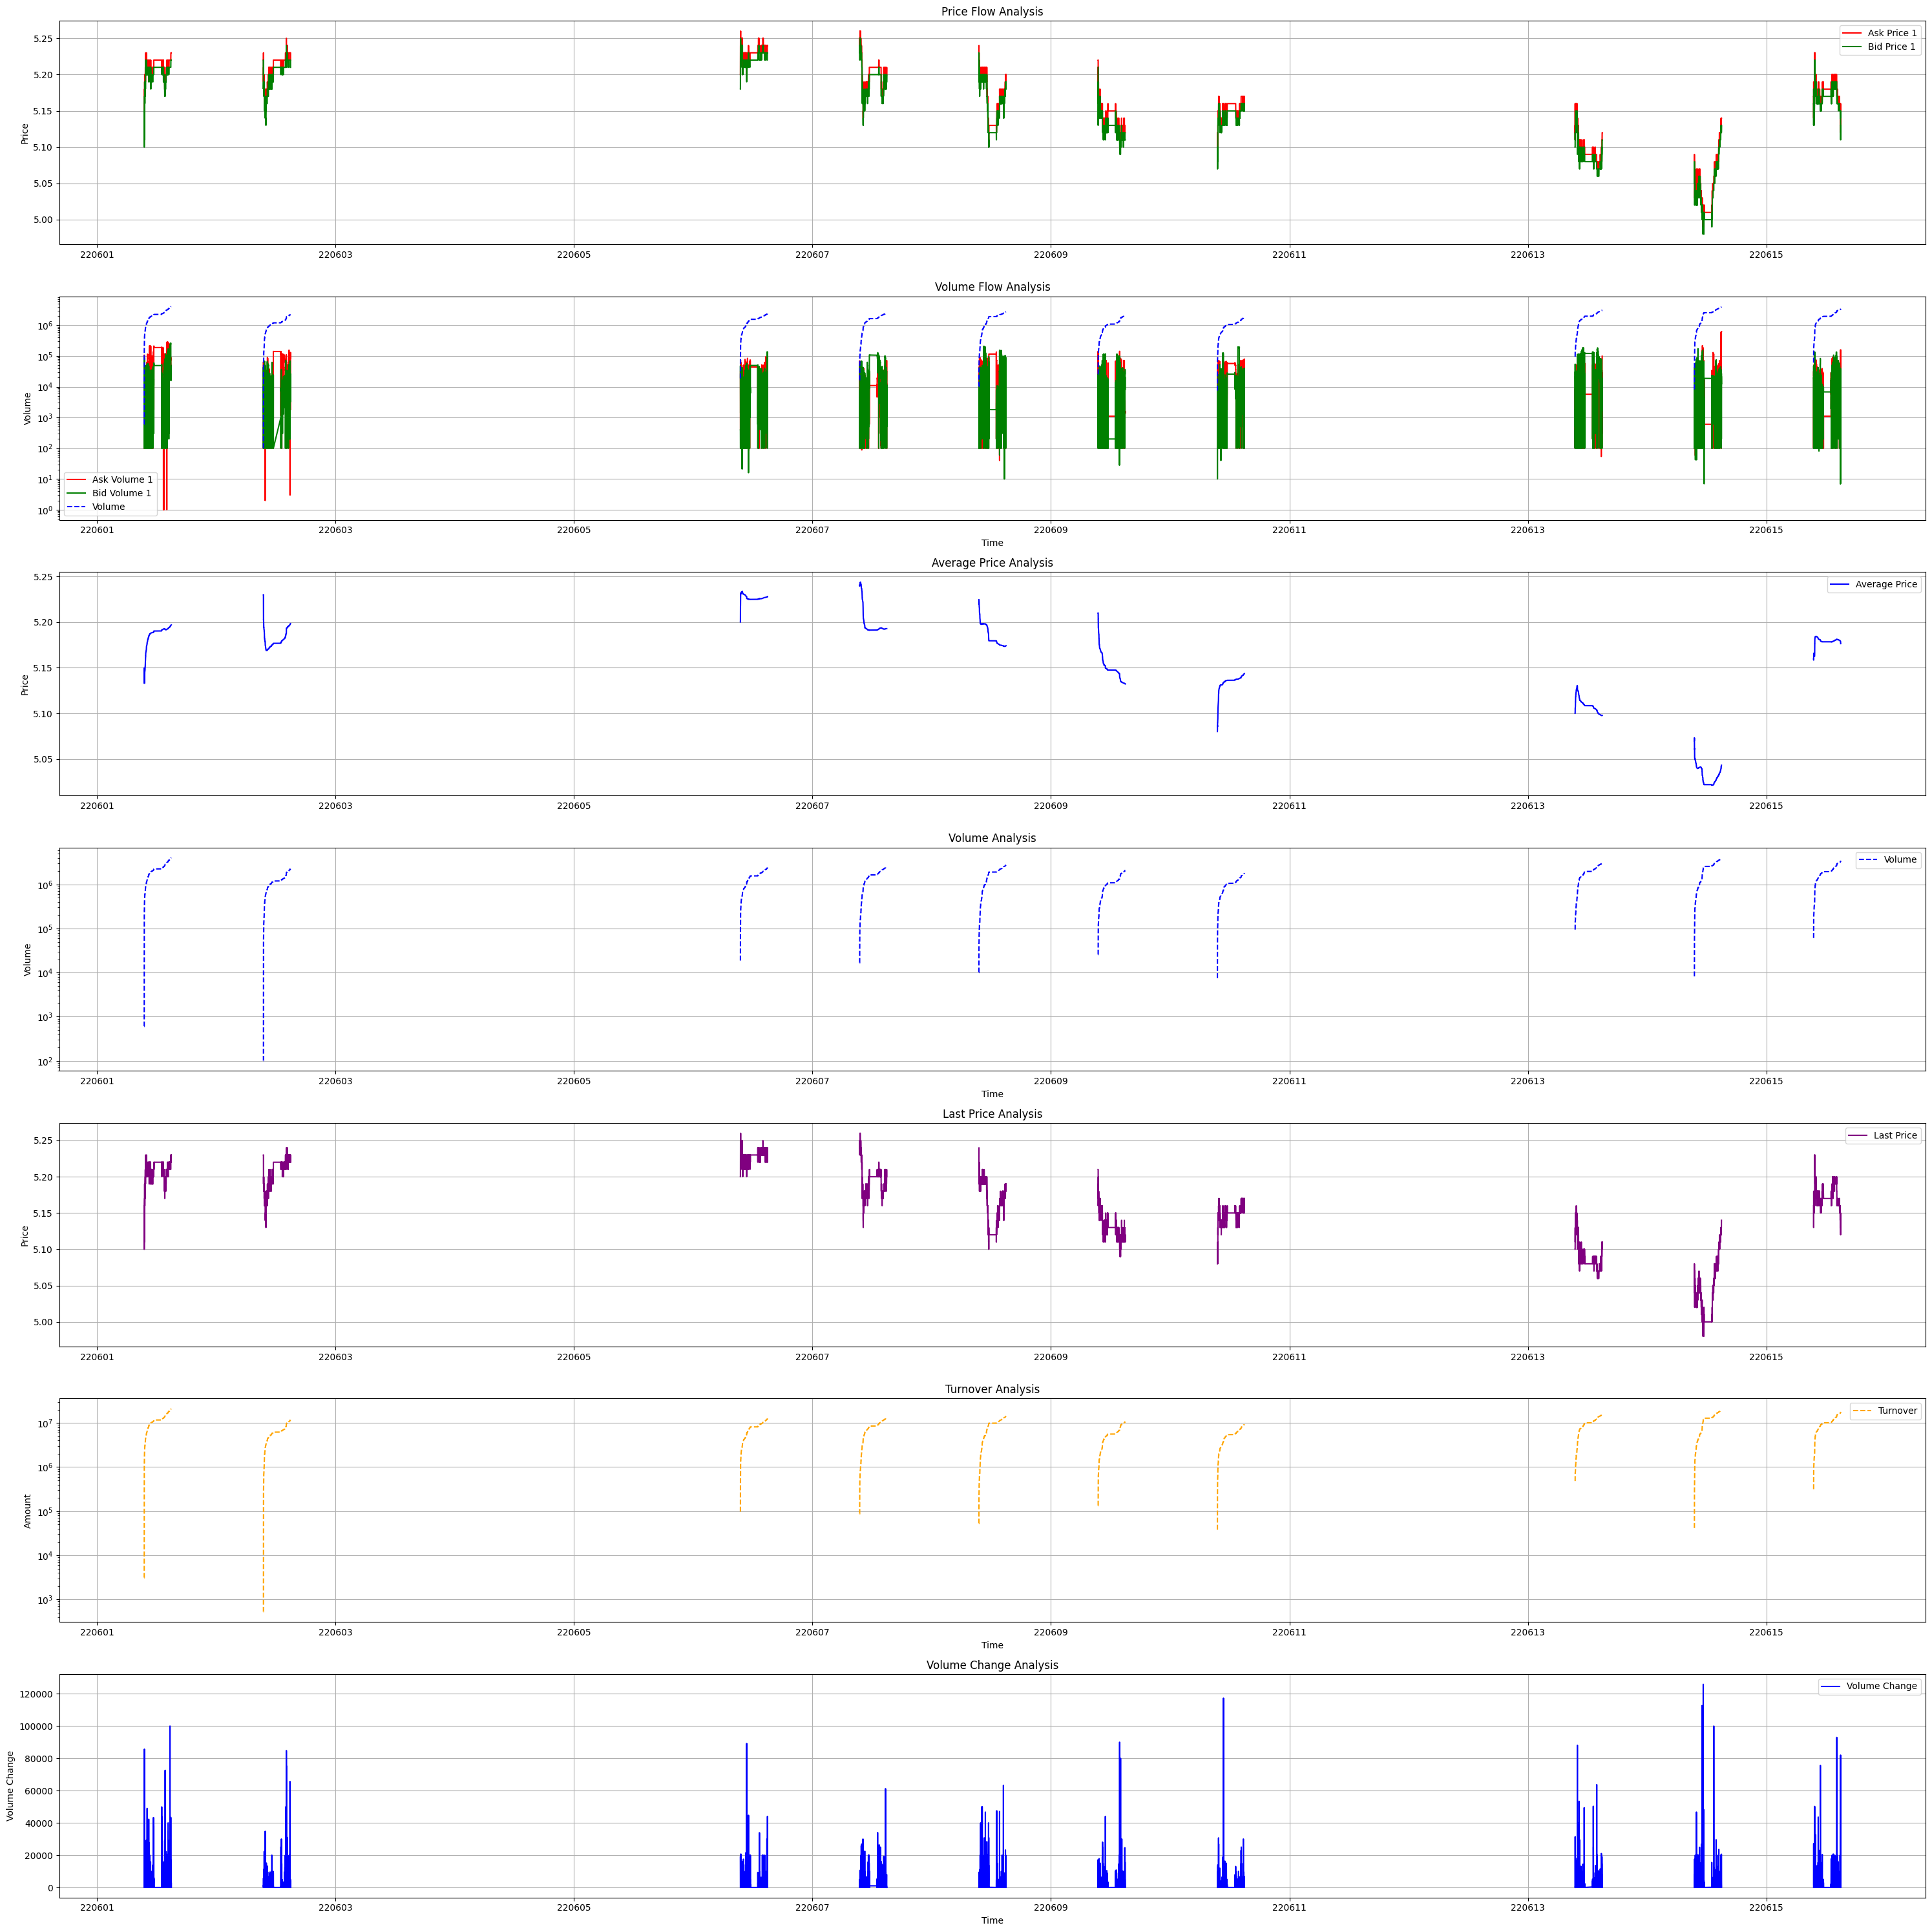

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig2, (ax1, ax2, ax3, ax4, ax5, ax6, ax8) = plt.subplots(7, 1, figsize=(30, 30))

# Helper function to plot a column daily so that different days do not connect.
def daily_plot(ax, x, y, color, label=None, linestyle='-'):
    first = True
    for day, group in df_filtered.groupby(df_filtered['DataTime'].dt.date):
        # Add the label only for the first group so legend entries are not duplicated.
        if first:
            ax.plot(group[x], group[y], color=color, linestyle=linestyle, label=label)
            first = False
        else:
            ax.plot(group[x], group[y], color=color, linestyle=linestyle)

# --- Price Analysis Plot ---
daily_plot(ax1, 'DataTime', 'AskPrice1', 'red', label='Ask Price 1')
daily_plot(ax1, 'DataTime', 'BidPrice1', 'green', label='Bid Price 1')
ax1.set_title('Price Flow Analysis')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))

# --- Volume Analysis Plot ---
# Because you are plotting three series, we use a loop over groups explicitly.
first = True
for day, group in df_filtered.groupby(df_filtered['DataTime'].dt.date):
    if first:
        ax2.plot(group['DataTime'], group['AskVolume1'], color='red', label='Ask Volume 1')
        ax2.plot(group['DataTime'], group['BidVolume1'], color='green', label='Bid Volume 1')
        ax2.plot(group['DataTime'], group['Volume'], color='blue', linestyle='--', label='Volume')
        first = False
    else:
        ax2.plot(group['DataTime'], group['AskVolume1'], color='red')
        ax2.plot(group['DataTime'], group['BidVolume1'], color='green')
        ax2.plot(group['DataTime'], group['Volume'], color='blue', linestyle='--')
ax2.set_title('Volume Flow Analysis')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Time')
ax2.legend()
ax2.grid(True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))
ax2.set_yscale('log')

# --- Average Price Plot ---
daily_plot(ax3, 'DataTime', 'AveragePrice', 'blue', label='Average Price')
ax3.set_title('Average Price Analysis')
ax3.set_ylabel('Price')
ax3.legend()
ax3.grid(True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))

# --- Volume Plot ---
daily_plot(ax4, 'DataTime', 'Volume', 'blue', label='Volume', linestyle='--')
ax4.set_title('Volume Analysis')
ax4.set_ylabel('Volume')
ax4.set_xlabel('Time')
ax4.legend()
ax4.grid(True)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))
ax4.set_yscale('log')

# --- LastPrice Plot ---
daily_plot(ax5, 'DataTime', 'LastPrice', 'purple', label='Last Price')
ax5.set_title('Last Price Analysis')
ax5.set_ylabel('Price')
ax5.legend()
ax5.grid(True)
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))

# --- Turnover Plot ---
daily_plot(ax6, 'DataTime', 'Turnover', 'orange', label='Turnover', linestyle='--')
ax6.set_title('Turnover Analysis')
ax6.set_ylabel('Amount')
ax6.set_xlabel('Time')
ax6.legend()
ax6.grid(True)
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))
ax6.set_yscale('log')

# --- Volume Change Plot ---
daily_plot(ax8, 'DataTime', 'VolumeChange', 'blue', label='Volume Change')
ax8.set_title('Volume Change Analysis')
ax8.set_ylabel('Volume Change')
ax8.set_xlabel('Time')
ax8.legend()
ax8.grid(True)
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))

plt.tight_layout()
plt.savefig('price_volume_analysis.png', dpi=120)
plt.show()

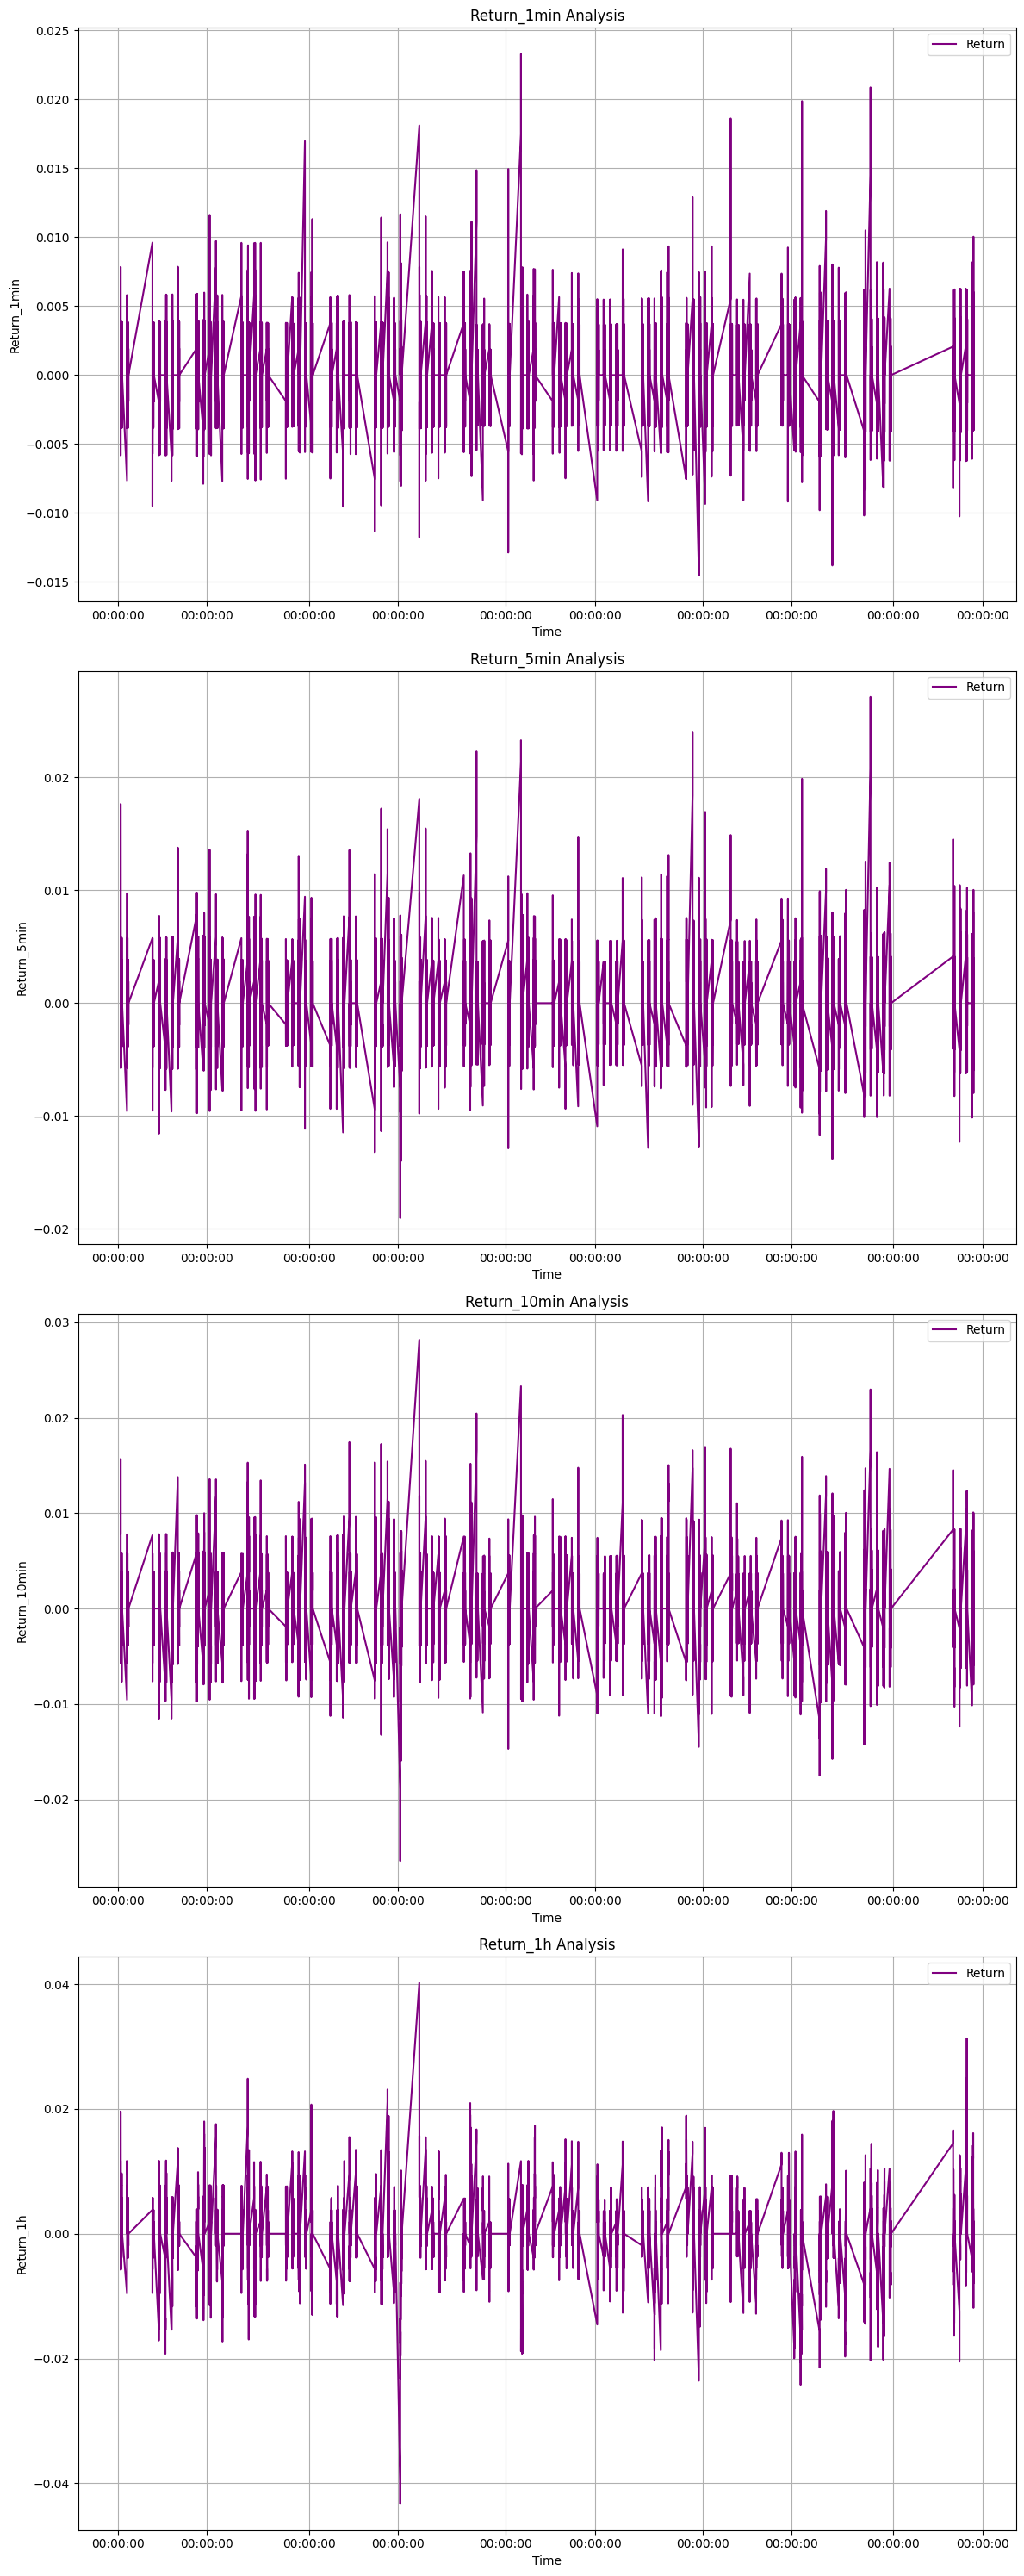

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig3, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 30))


# Price Analysis Plot (top subplot)
ax1.plot(df_filtered['DataTime'], df_filtered['Return_1min'], color='purple', label='Return')
ax1.set_title('Return_1min Analysis')
ax1.set_ylabel('Return_1min')
ax1.set_xlabel('Time')
ax1.legend()
ax1.grid(True)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))

ax2.plot(df_filtered['DataTime'], df_filtered['Return_5min'], color='purple', label='Return')
ax2.set_title('Return_5min Analysis')
ax2.set_ylabel('Return_5min')
ax2.set_xlabel('Time')
ax2.legend()
ax2.grid(True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))

ax3.plot(df_filtered['DataTime'], df_filtered['Return_10min'], color='purple', label='Return')
ax3.set_title('Return_10min Analysis')
ax3.set_ylabel('Return_10min')
ax3.set_xlabel('Time')
ax3.legend()
ax3.grid(True)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))

ax4.plot(df_filtered['DataTime'], df_filtered['Return_1h'], color='purple', label='Return')
ax4.set_title('Return_1h Analysis')
ax4.set_ylabel('Return_1h')
ax4.set_xlabel('Time')
ax4.legend()
ax4.grid(True)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.tight_layout()
plt.savefig('return_1min_5min_30min_1h_analysis.png', dpi=120)
plt.show()

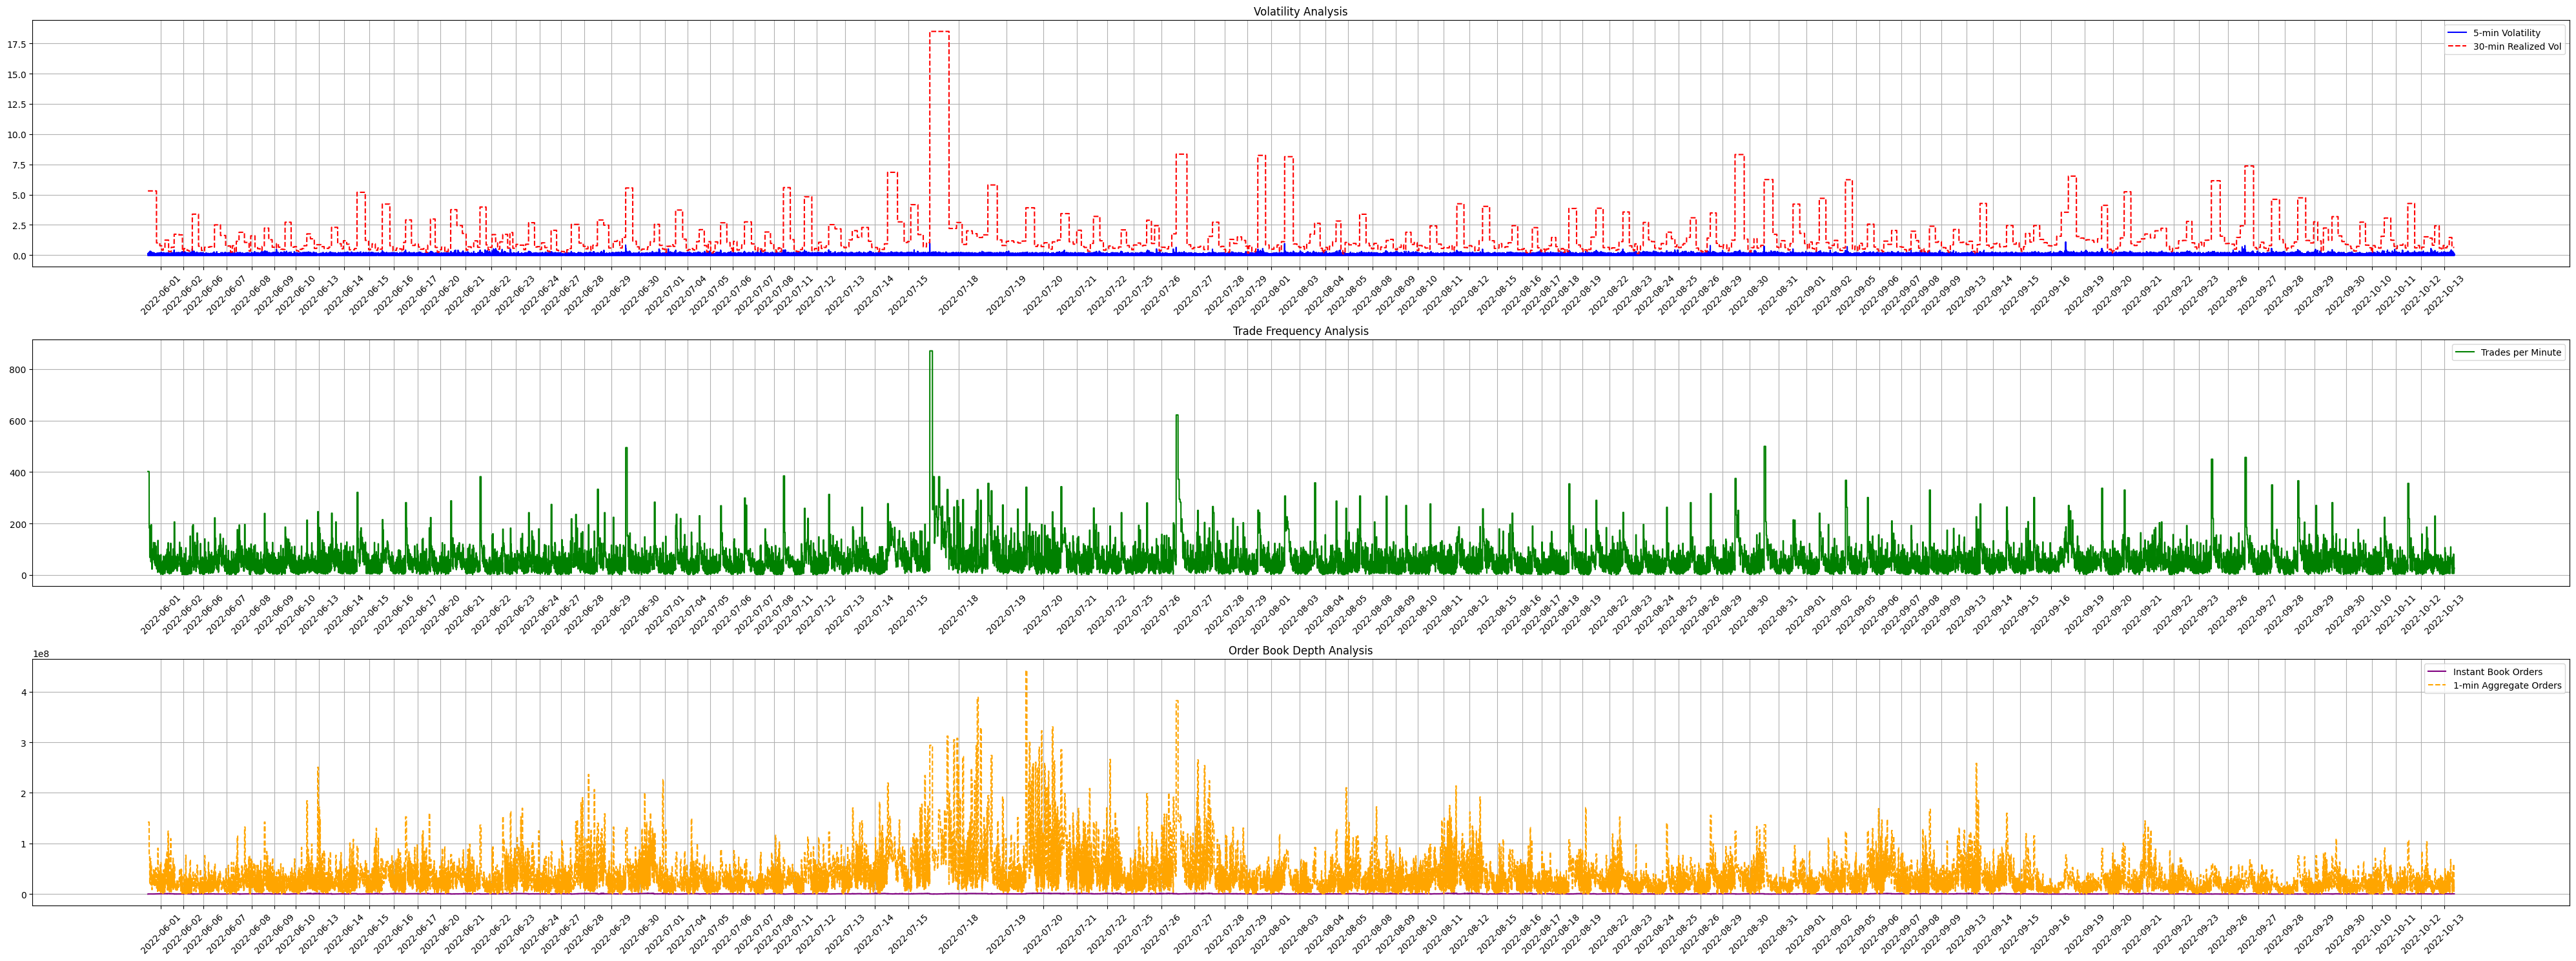

In [6]:
import numpy as np
# Calculate volatility (using 1-minute returns)
df_filtered['Volatility_5min'] = df_filtered['Return_1min'].rolling(window=5, min_periods=1).std() * 100  # 5-minute rolling volatility
df_filtered['RealizedVol_30min'] = df_filtered['Return_1min'].abs().resample('30min').sum().reindex(df_filtered.index, method='ffill')  # 30min realized volatility

# Calculate number of trades (assuming each row represents a trade)
df_filtered['Trades_1min'] = df_filtered.resample('1min', on='DataTime')['Volume'].transform('count')
df_filtered['Trades_5min'] = df_filtered.resample('5min', on='DataTime')['Volume'].transform('count').ffill()

# Calculate number of book orders (sum of all ask/bid volumes)
df_filtered['TotalBookOrders'] = (df_filtered[[f'AskVolume{i}' for i in range(1,11)] + 
                                             [f'BidVolume{i}' for i in range(1,11)]].sum(axis=1))
df_filtered['BookOrders_1min'] = df_filtered.resample('1min', on='DataTime')['TotalBookOrders'].transform('sum').ffill()



# Create a continuous plot index to remove gaps corresponding to days with no data
df_filtered['plot_index'] = np.arange(len(df_filtered))

# Determine tick positions and labels (one tick per day, placed in the middle of each day's data segment)
tick_positions = []
tick_labels = []
for day, group in df_filtered.groupby(df_filtered['DataTime'].dt.date):
    pos = group['plot_index'].iloc[len(group) // 2]  # Middle index of the day's data points
    tick_positions.append(pos)
    tick_labels.append(day.strftime('%Y-%m-%d'))

# Plot the metrics using the continuous index on the x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 15))

# Volatility Plot
ax1.plot(df_filtered['plot_index'], df_filtered['Volatility_5min'], 
         color='blue', label='5-min Volatility')
ax1.plot(df_filtered['plot_index'], df_filtered['RealizedVol_30min'], 
         color='red', linestyle='--', label='30-min Realized Vol')
ax1.set_title('Volatility Analysis')
ax1.legend()
ax1.grid(True)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45)

# Trade Count Plot
ax2.plot(df_filtered['plot_index'], df_filtered['Trades_1min'], 
         color='green', label='Trades per Minute')
ax2.set_title('Trade Frequency Analysis')
ax2.legend()
ax2.grid(True)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels, rotation=45)

# Book Orders Plot
ax3.plot(df_filtered['plot_index'], df_filtered['TotalBookOrders'], 
         color='purple', label='Instant Book Orders')
ax3.plot(df_filtered['plot_index'], df_filtered['BookOrders_1min'], 
         color='orange', linestyle='--', label='1-min Aggregate Orders')
ax3.set_title('Order Book Depth Analysis')
ax3.legend()
ax3.grid(True)
ax3.set_xticks(tick_positions)
ax3.set_xticklabels(tick_labels, rotation=45)

plt.tight_layout()
plt.savefig('volatility_trade_frequency_order_book_depth_analysis.png', dpi=120)
plt.show()

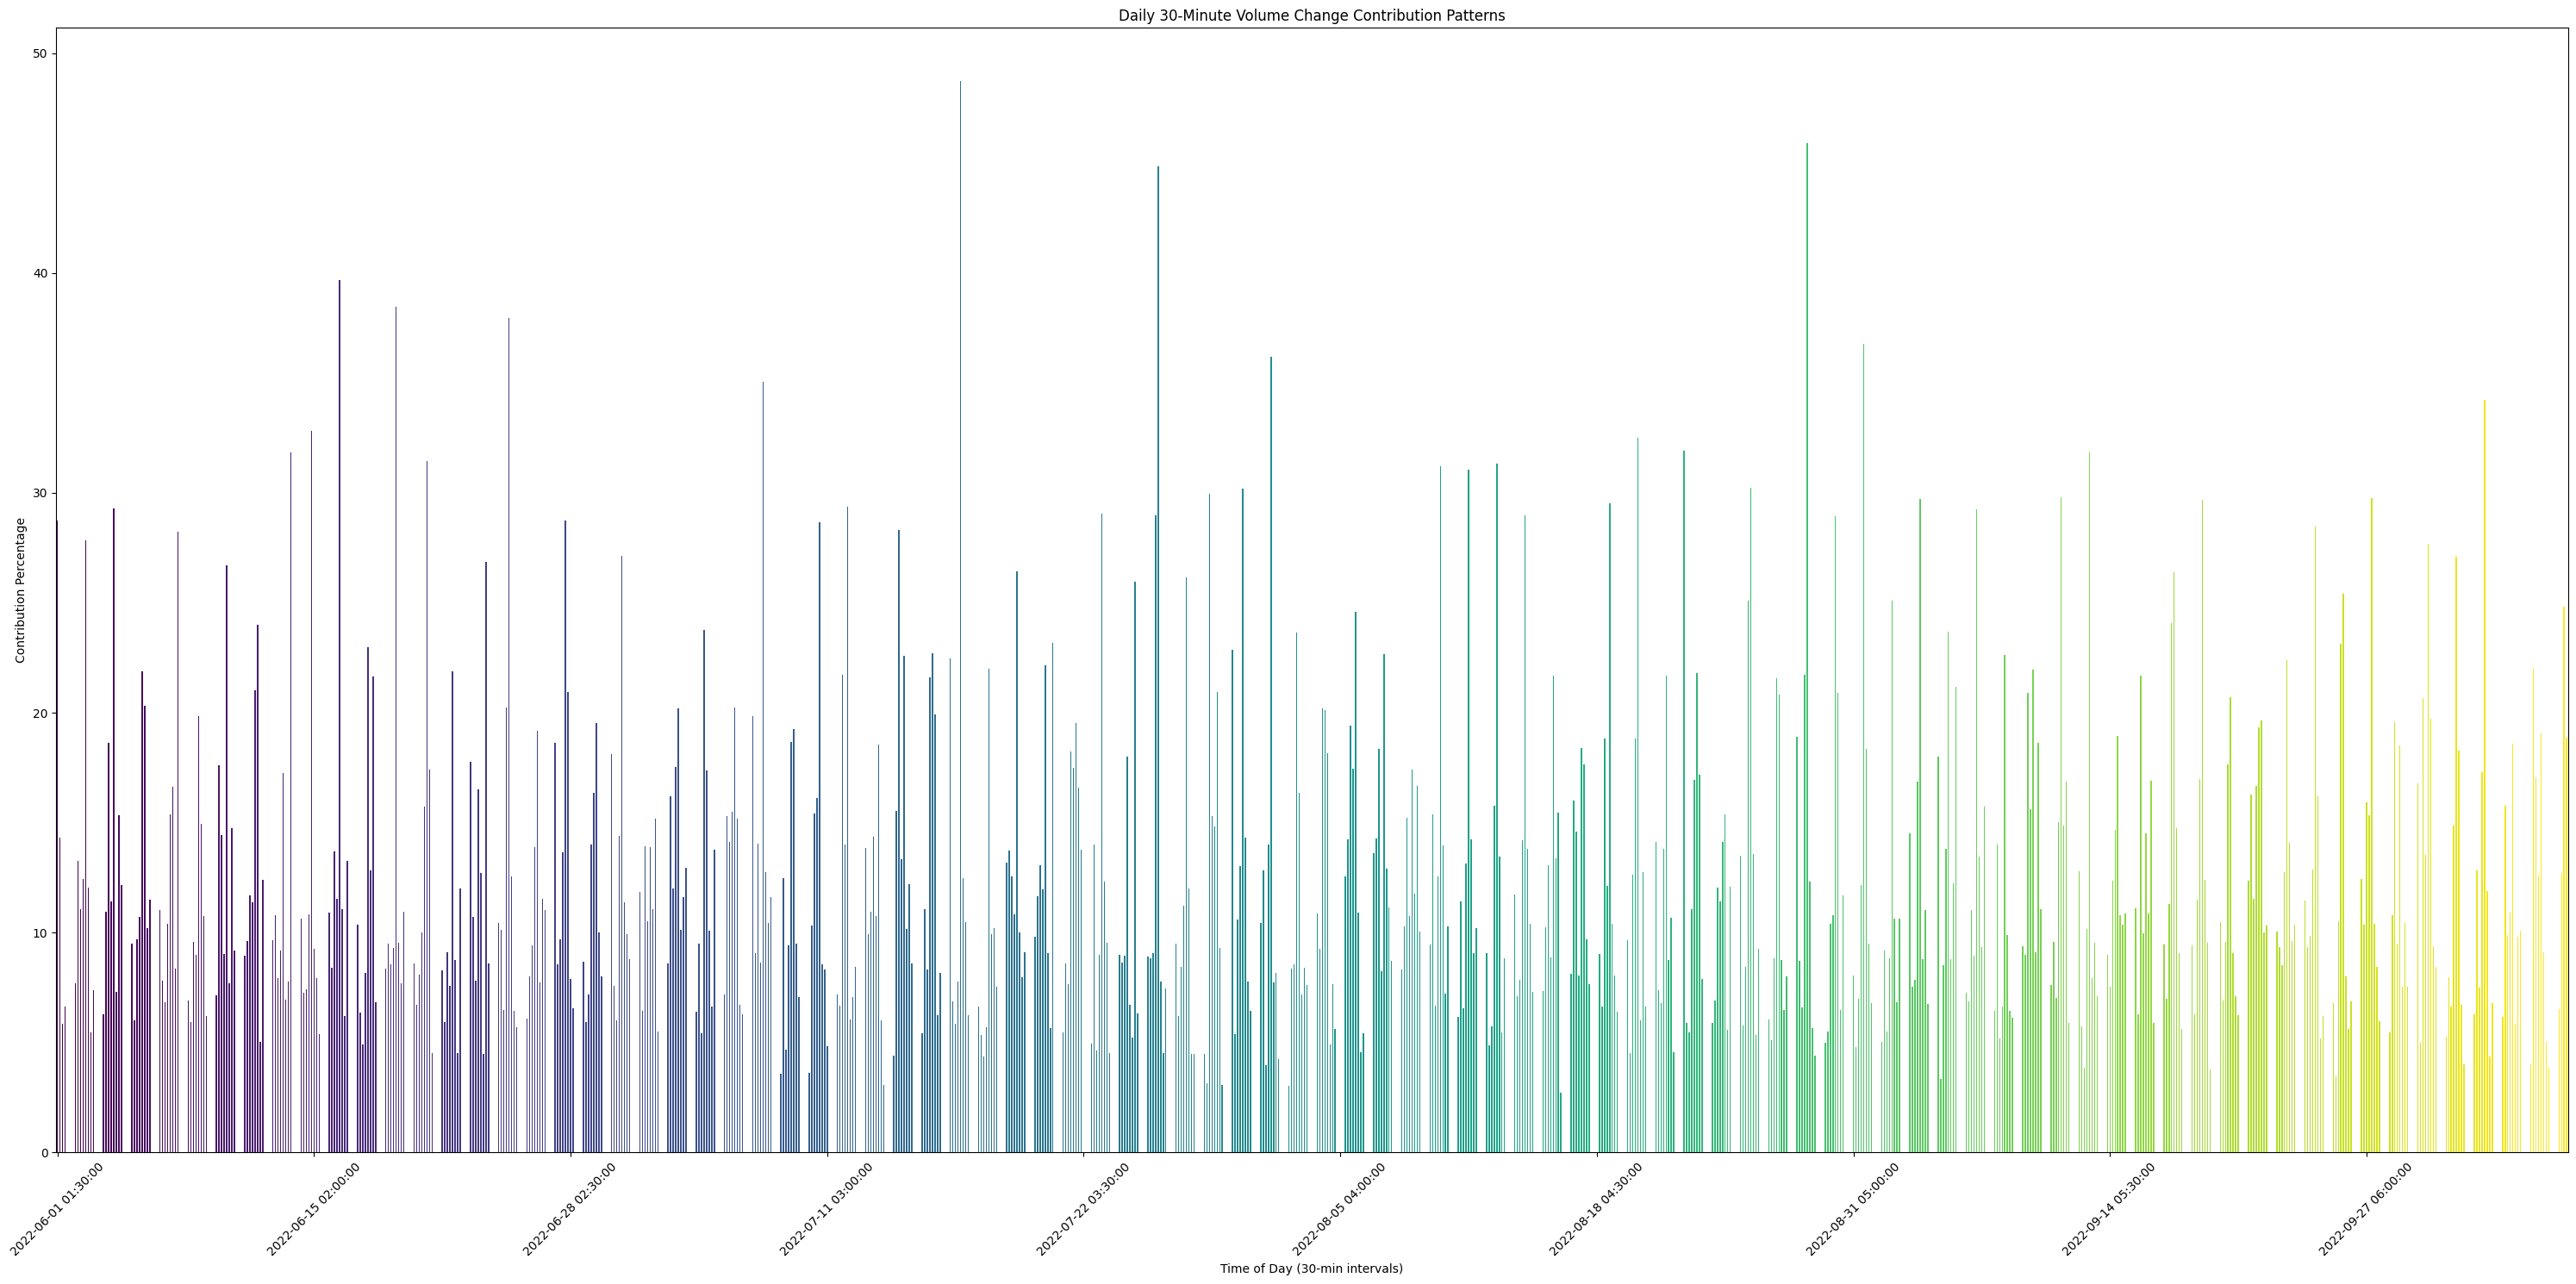

Top Volume Change Intervals by Frequency:
(2022-07-18 00:00:00, 2022-07-18 00:00:00, 2022-07-18 01:30:00)    48.71%
(2022-08-30 00:00:00, 2022-08-30 00:00:00, 2022-08-30 01:30:00)    45.91%
(2022-07-27 00:00:00, 2022-07-27 00:00:00, 2022-07-27 01:30:00)    44.84%
(2022-06-16 00:00:00, 2022-06-16 00:00:00, 2022-06-16 01:30:00)    39.66%
(2022-06-20 00:00:00, 2022-06-20 00:00:00, 2022-06-20 01:30:00)    38.45%
Name: VolumeChange, dtype: object


In [12]:
# Calculate daily 30-minute volume change contributions
daily_volume = df_filtered.groupby(pd.Grouper(freq='D'))['VolumeChange'].resample('30min').sum()
daily_volume_pct = daily_volume.groupby(level=0).apply(lambda x: x / x.sum() * 100)

# Unstack so that the columns become the different dates,
# while the index (x‐axis) is the 30‐minute interval timestamps.
daily_volume_pct_unstack = daily_volume_pct.unstack(0)

# Modify the index to format timestamps to show only the time (hour and minute)
daily_volume_pct_unstack.index = daily_volume_pct_unstack.index.map(lambda ts: ts[1])

# Plotting the heatmap with modified x-axis labels and turning off the legend
fig, ax1 = plt.subplots(1, 1, figsize=(30, 15))
daily_volume_pct_unstack.plot(kind='bar', stacked=True, ax=ax1, cmap='viridis', legend=False)
ax1.set_title('Daily 30-Minute Volume Change Contribution Patterns')
ax1.set_ylabel('Contribution Percentage')
ax1.set_xlabel('Time of Day (30-min intervals)')

# Option 1: Rotate the tick labels for better readability.
ax1.tick_params(axis='x', rotation=45)

# Option 2: Reduce the number of ticks shown.
from matplotlib.ticker import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(nbins=10))

plt.tight_layout()
plt.show()

# Print statistical summary
print("Top Volume Change Intervals by Frequency:")
print(daily_volume_pct.groupby(daily_volume_pct.index).mean().nlargest(5).round(2).astype(str) + '%')

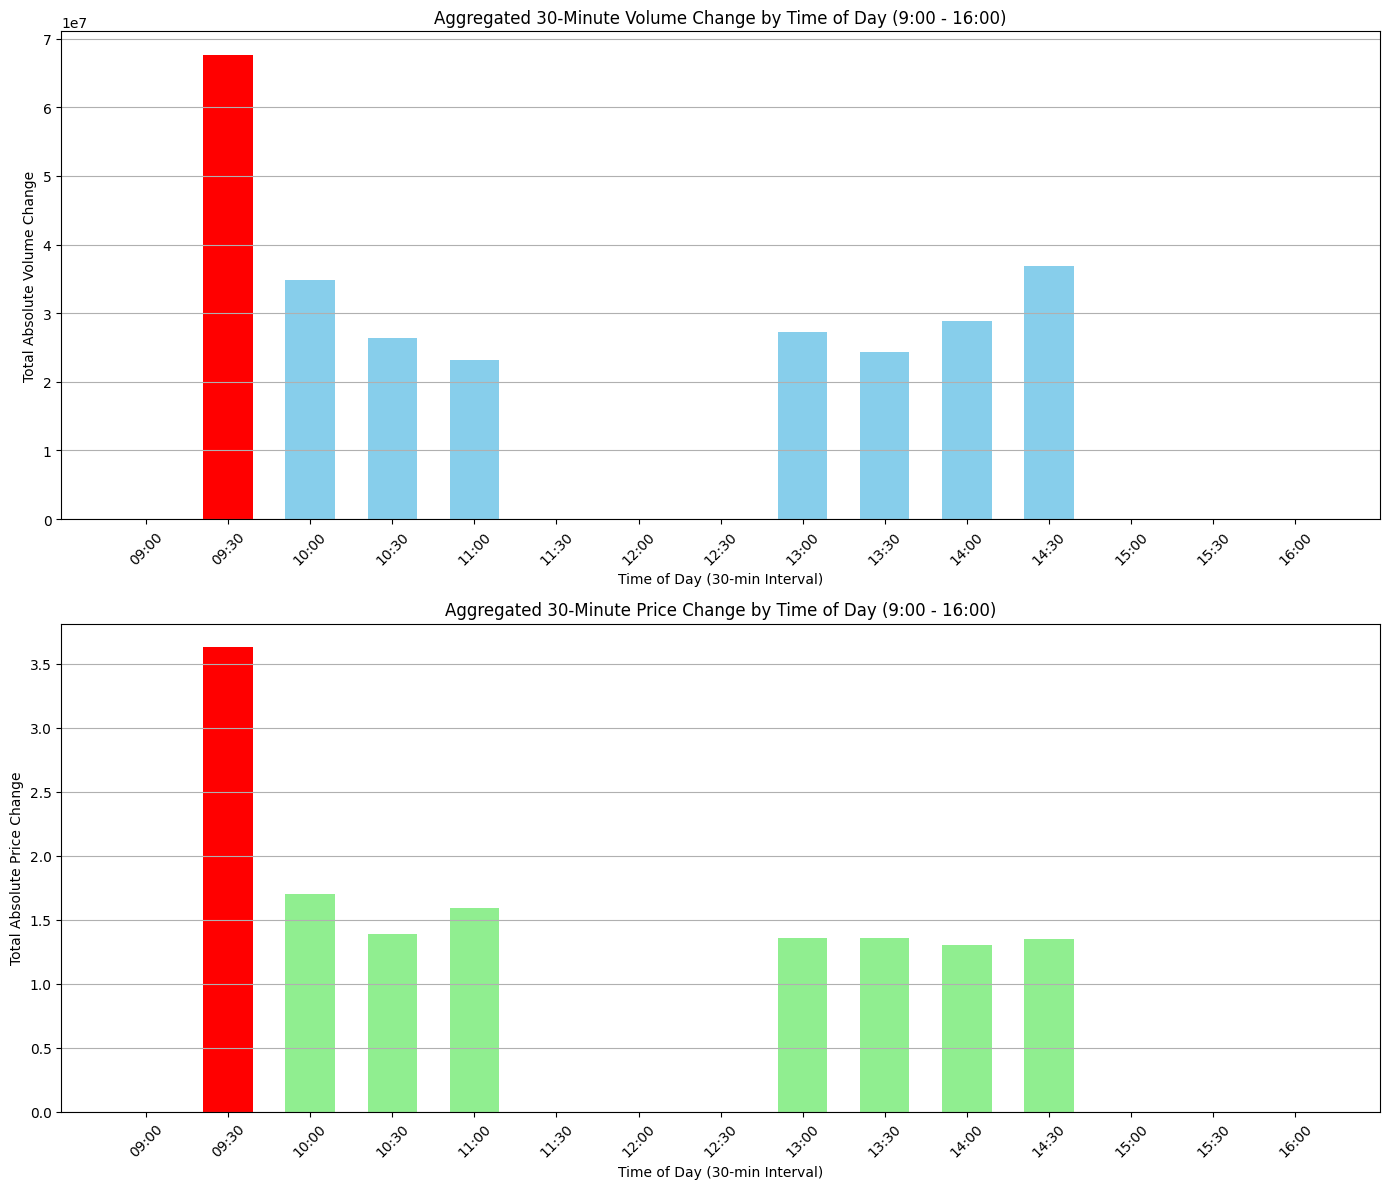

Most Active Volume Section (30-min interval): 09:30:00 with total volume change: 67674729.0
Most Active Price Change Section (30-min interval): 09:30:00 with total price change: 3.6299999999999963


In [8]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Define the trading time window from 9:00 AM to 4:00 PM
start_time = datetime.time(9, 0)
end_time = datetime.time(16, 0)

# --- Aggregation of 30-minute metrics by time-of-day within trading hours ---

# Resample 'VolumeChange' into 30-minute intervals using 'DataTime'
volume_change_30min = df_filtered.resample('30min', on='DataTime')['VolumeChange']\
                              .apply(lambda x: x.abs().sum())
# Filter the intervals to only include times between 9:00 and 16:00
volume_change_30min = volume_change_30min[
    (volume_change_30min.index.time >= start_time) & (volume_change_30min.index.time <= end_time)
]

# Group by time-of-day (extracting only the time part)
volume_change_by_time = volume_change_30min.groupby(lambda t: t.time()).sum()

# Identify the most active 30-minute interval in volume change
most_active_volume_section = volume_change_by_time.idxmax()
most_active_volume_value = volume_change_by_time.max()

# --- Price Change Aggregation ---

# Define a helper function to compute the absolute price change in each interval.
def absolute_price_change(x):
    if len(x) > 0:
        return abs(x.iloc[-1] - x.iloc[0])
    else:
        return 0

# Resample 'LastPrice' into 30-minute intervals using 'DataTime'
price_change_30min = df_filtered.resample('30min', on='DataTime')['LastPrice'].apply(absolute_price_change)

# Filter the intervals to only include times between 9:00 and 16:00
price_change_30min = price_change_30min[
    (price_change_30min.index.time >= start_time) & (price_change_30min.index.time <= end_time)
]

# Group by time-of-day for price changes
price_change_by_time = price_change_30min.groupby(lambda t: t.time()).sum()

# Identify the most active 30-minute interval in price change
most_active_price_section = price_change_by_time.idxmax()
most_active_price_value = price_change_by_time.max()

# --- Prepare data for plotting ---

# Sorting time intervals and formatting labels for volume change plotting
times_volume = sorted(volume_change_by_time.index)
values_volume = [volume_change_by_time[t] for t in times_volume]
time_labels_volume = [t.strftime("%H:%M") for t in times_volume]

# Sorting time intervals and formatting labels for price change plotting
times_price = sorted(price_change_by_time.index)
values_price = [price_change_by_time[t] for t in times_price]
time_labels_price = [t.strftime("%H:%M") for t in times_price]

# Define bar colors, highlighting the most active interval(s) in red.
colors_volume = ['red' if t == most_active_volume_section else 'skyblue' for t in times_volume]
colors_price = ['red' if t == most_active_price_section else 'lightgreen' for t in times_price]

# --- Plotting the results ---

fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot for Volume Change
x_positions_volume = np.arange(len(times_volume))
axs[0].bar(x_positions_volume, values_volume, color=colors_volume, width=0.6)
axs[0].set_xticks(x_positions_volume)
axs[0].set_xticklabels(time_labels_volume, rotation=45)
axs[0].set_title('Aggregated 30-Minute Volume Change by Time of Day (9:00 - 16:00)')
axs[0].set_xlabel('Time of Day (30-min Interval)')
axs[0].set_ylabel('Total Absolute Volume Change')
axs[0].grid(axis='y')

# Plot for Price Change
x_positions_price = np.arange(len(times_price))
axs[1].bar(x_positions_price, values_price, color=colors_price, width=0.6)
axs[1].set_xticks(x_positions_price)
axs[1].set_xticklabels(time_labels_price, rotation=45)
axs[1].set_title('Aggregated 30-Minute Price Change by Time of Day (9:00 - 16:00)')
axs[1].set_xlabel('Time of Day (30-min Interval)')
axs[1].set_ylabel('Total Absolute Price Change')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

# --- Report the Most Active Sections ---
print("Most Active Volume Section (30-min interval):", most_active_volume_section, 
      "with total volume change:", most_active_volume_value)
print("Most Active Price Change Section (30-min interval):", most_active_price_section, 
      "with total price change:", most_active_price_value)